# Classification - Decision Tree - Major Occupation

Now we try a Decision Tree Classifier from sklearn on the same Internat Usage Major Occupation data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [2]:
# Import feature subset with Major_Occupation Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
import sys
sys.path.append('../resources')
from w6support import plot_2d_class
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

originalDF = pd.read_csv('occupationFeatureSubset.csv')

# Next we check the Major_Occupation options in the dataset for use with classification
print(originalDF.Major_Occupation.unique())

# Now we replace those values with integers for use with the classification algorithm
occupation_values = {"Major_Occupation": {"Professional": 1, "Education": 2, "Computer": 3, "Other": 4, "Management": 5}}
originalDF.replace(occupation_values, inplace=True)

featureDF = originalDF[originalDF.columns.difference(['Major_Occupation'])]

predNames = list(originalDF.columns[originalDF.columns != 'Major_Occupation'])

['Professional' 'Education' 'Computer' 'Other' 'Management']


In [3]:
from sklearn.model_selection import train_test_split
X, y = featureDF, originalDF['Major_Occupation']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Derive Xtrain2, which is the 
XtrainDf = pd.DataFrame(data=Xtrain, columns=predNames)
c1 = 'Age'
c2 = 'Gender'
colNames = [c1, c2]
Xtrain2 = XtrainDf[colNames]
nTrain = Xtrain2.shape[0]

XtestDf = pd.DataFrame(data=Xtest, columns=predNames)
Xtest2 = XtestDf[colNames]
Xcombined2 = pd.concat([Xtrain2, Xtest2])
ycombined = np.hstack((ytrain, ytest))


We also look at comparing different decision trees to the `Age` $\times$ `Gender` data, based on the following conditions

1. maximum tree depth (2,3,4,5)
2. choice of tree impurity algorithm (`gini` or `entropy`)

which is 8 combinations in all.

Plotting pic/depth_2_gini_decisionTree_Occupation_Age_Gender.pdf
0.3649851632047478
[[374  13   0  46   0]
 [191 255   0  22   0]
 [362  37   0  18   0]
 [331  28   0 109   0]
 [208   5   0  23   0]]
              precision    recall  f1-score   support

           1      0.255     0.864     0.394       433
           2      0.754     0.545     0.633       468
           3      0.000     0.000     0.000       417
           4      0.500     0.233     0.318       468
           5      0.000     0.000     0.000       236

   micro avg      0.365     0.365     0.365      2022
   macro avg      0.302     0.328     0.269      2022
weighted avg      0.345     0.365     0.304      2022

Plotting pic/depth_2_entropy_decisionTree_Occupation_Age_Gender.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.38229475766567755
[[  0  13 263 157   0]
 [  0 255 142  71   0]
 [  0  37 288  92   0]
 [  0  28 210 230   0]
 [  0   5 135  96   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       433
           2      0.754     0.545     0.633       468
           3      0.277     0.691     0.396       417
           4      0.356     0.491     0.413       468
           5      0.000     0.000     0.000       236

   micro avg      0.382     0.382     0.382      2022
   macro avg      0.278     0.345     0.288      2022
weighted avg      0.314     0.382     0.324      2022

Plotting pic/depth_3_gini_decisionTree_Occupation_Age_Gender.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.36993076162215627
[[287  13  87  46   0]
 [108 255  83  22   0]
 [265  37  97  18   0]
 [274  28  57 109   0]
 [175   5  33  23   0]]
              precision    recall  f1-score   support

           1      0.259     0.663     0.372       433
           2      0.754     0.545     0.633       468
           3      0.272     0.233     0.251       417
           4      0.500     0.233     0.318       468
           5      0.000     0.000     0.000       236

   micro avg      0.370     0.370     0.370      2022
   macro avg      0.357     0.335     0.315      2022
weighted avg      0.402     0.370     0.351      2022

Plotting pic/depth_3_entropy_decisionTree_Occupation_Age_Gender.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.38229475766567755
[[  0  13 263 157   0]
 [  0 255 142  71   0]
 [  0  37 288  92   0]
 [  0  28 210 230   0]
 [  0   5 135  96   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       433
           2      0.754     0.545     0.633       468
           3      0.277     0.691     0.396       417
           4      0.356     0.491     0.413       468
           5      0.000     0.000     0.000       236

   micro avg      0.382     0.382     0.382      2022
   macro avg      0.278     0.345     0.288      2022
weighted avg      0.314     0.382     0.324      2022

Plotting pic/depth_4_gini_decisionTree_Occupation_Age_Gender.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.38625123639960435
[[  0  22 254 157   0]
 [  0 271 126  71   0]
 [  0  45 280  92   0]
 [  0  33 205 230   0]
 [  0   9 131  96   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       433
           2      0.713     0.579     0.639       468
           3      0.281     0.671     0.396       417
           4      0.356     0.491     0.413       468
           5      0.000     0.000     0.000       236

   micro avg      0.386     0.386     0.386      2022
   macro avg      0.270     0.348     0.290      2022
weighted avg      0.305     0.386     0.325      2022

Plotting pic/depth_4_entropy_decisionTree_Occupation_Age_Gender.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3827893175074184
[[ 71  48 166 148   0]
 [ 28 298  79  63   0]
 [ 48  75 176 118   0]
 [ 65  48 126 229   0]
 [ 54  19  89  74   0]]
              precision    recall  f1-score   support

           1      0.267     0.164     0.203       433
           2      0.611     0.637     0.623       468
           3      0.277     0.422     0.334       417
           4      0.362     0.489     0.416       468
           5      0.000     0.000     0.000       236

   micro avg      0.383     0.383     0.383      2022
   macro avg      0.303     0.342     0.315      2022
weighted avg      0.339     0.383     0.353      2022

Plotting pic/depth_5_gini_decisionTree_Occupation_Age_Gender.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.39020771513353114
[[105  22 158 148   0]
 [ 56 271  78  63   0]
 [ 70  45 184 118   0]
 [ 88  33 118 229   0]
 [ 61   9  92  74   0]]
              precision    recall  f1-score   support

           1      0.276     0.242     0.258       433
           2      0.713     0.579     0.639       468
           3      0.292     0.441     0.351       417
           4      0.362     0.489     0.416       468
           5      0.000     0.000     0.000       236

   micro avg      0.390     0.390     0.390      2022
   macro avg      0.329     0.350     0.333      2022
weighted avg      0.368     0.390     0.372      2022

Plotting pic/depth_5_entropy_decisionTree_Occupation_Age_Gender.pdf


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3837784371909001
[[ 54  24 168 187   0]
 [ 31 272  88  77   0]
 [ 35  47 193 142   0]
 [ 47  40 124 257   0]
 [ 27  11  95 103   0]]
              precision    recall  f1-score   support

           1      0.278     0.125     0.172       433
           2      0.690     0.581     0.631       468
           3      0.289     0.463     0.356       417
           4      0.336     0.549     0.417       468
           5      0.000     0.000     0.000       236

   micro avg      0.384     0.384     0.384      2022
   macro avg      0.319     0.344     0.315      2022
weighted avg      0.357     0.384     0.353      2022



/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


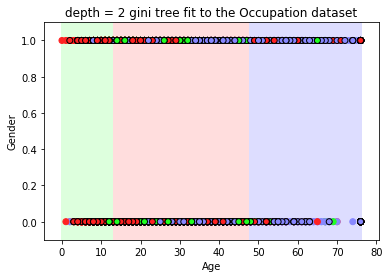

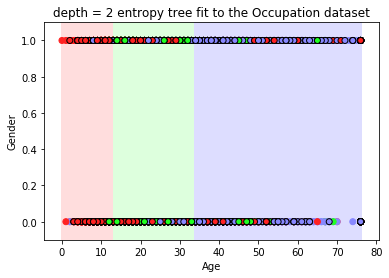

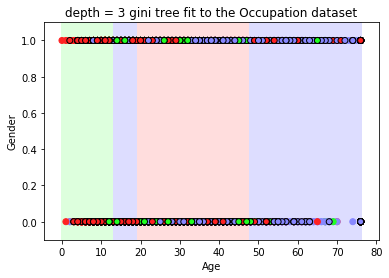

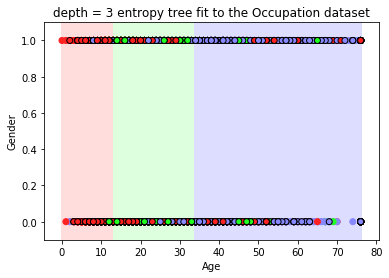

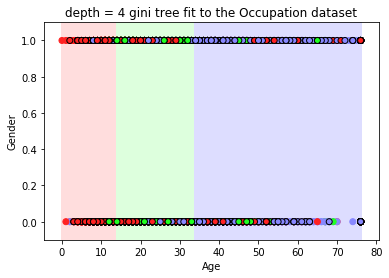

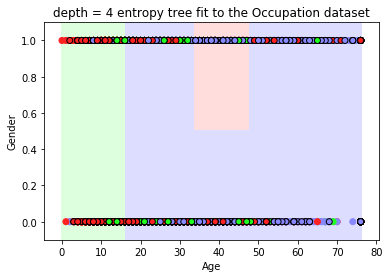

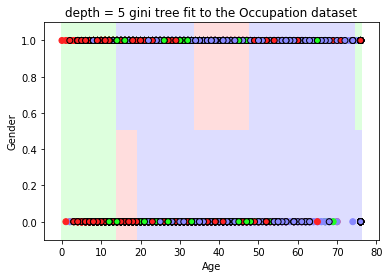

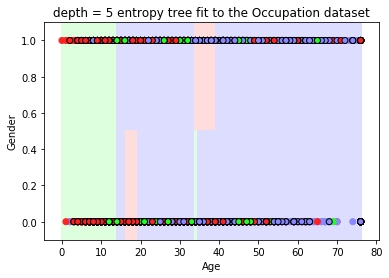

In [4]:
# Create color maps for 3-class classification problem
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

pattern = re.compile('[\W_]+', re.UNICODE)

c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
c2 = pattern.sub("",c2.title())

for treeDepth in range(2,6):
  for criterion in ["gini","entropy"]:
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
    tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)

    tree2.fit(Xtrain2, ytrain)

    plotTitle = "depth = %i %s %s fit to the %s dataset" % (treeDepth, criterion, "tree", "Occupation")
    fileTitle = "pic/depth_%i_%s_%s_%s_%s_%s.pdf" % (treeDepth, criterion, "decisionTree", "Occupation", c1, c2)

    print("Plotting "+fileTitle)
    plot_2d_class(Xcombined2, ycombined, nTrain, tree2, plotTitle, fileTitle, cmap_light, cmap_bold)

    ytree2 = tree2.predict(Xtest2)
    print(accuracy_score(ytest, ytree2))
    print(confusion_matrix(ytest, ytree2))
    print(classification_report(ytest, ytree2, digits=3))

We include all features below

In [5]:
criterion = "entropy"
treeDepth = 8
tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
tree.fit(Xtrain, ytrain)
y_treeTest = tree.predict(Xtest)
print(accuracy_score(ytest, y_treeTest))
print(confusion_matrix(ytest, y_treeTest))
print(classification_report(ytest, y_treeTest, digits=3))

0.4342235410484669
[[ 83  26 141 181   2]
 [ 71 262  87  47   1]
 [ 90  42 207  76   2]
 [ 65  28  49 324   2]
 [ 69   6  66  93   2]]
              precision    recall  f1-score   support

           1      0.220     0.192     0.205       433
           2      0.720     0.560     0.630       468
           3      0.376     0.496     0.428       417
           4      0.449     0.692     0.545       468
           5      0.222     0.008     0.016       236

   micro avg      0.434     0.434     0.434      2022
   macro avg      0.397     0.390     0.365      2022
weighted avg      0.421     0.434     0.406      2022



One of the main advantages of decision trees is the fact that they provide easily interpreted models for prediction. Indeed, the rules encoded in the tree can help to understand how the predictors combine and contribute to explaining the classification. As such, decision trees are often described as _white box_, where other algorithms (in particular, neural networks) are best seen as _black box_.

To aid interpretation, `scikit-learn` can output the model in a graph description language such as [dot](https://www.graphviz.org/pdf/dotguide.pdf) using the `export_graphviz` method. If you wish, you can export the `dot` file and process it using tools, both command line such as [dotty](https://www.graphviz.org/pdf/dottyguide.pdf) and more general tools such as those listed [here](https://en.wikipedia.org/wiki/Graphviz). However, it is probably more convenient to use a `dot` postprocessor (`pydotplus`) directly from within the notebook to create an object that can be displayed in the notebook, or saved to a file as below.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.74802 to fit



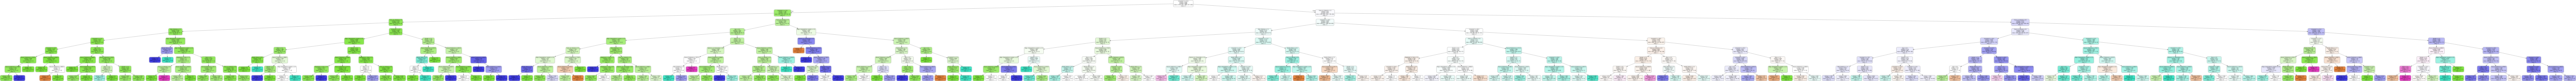

True

In [6]:
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn.tree import export_graphviz
        
dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=predNames,  
    # the parameters below are new in sklearn 0.18
    class_names=['1', '2', '3', '4', '5'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
graph.write_pdf("pic/tree.pdf")
